In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/df.csv')
df['Age'] = df['Rings'] + 1.5 #add a new column for 'Age' to the existing dataset

#Print the first five rows
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


# Basic EDA

In [11]:
# Check the shape of the dataset
df.shape

(4177, 10)

In [10]:
# Check the data types of the columns
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

In [9]:
# Check for missing values
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [8]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

In [12]:
# Summary statistics for the dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


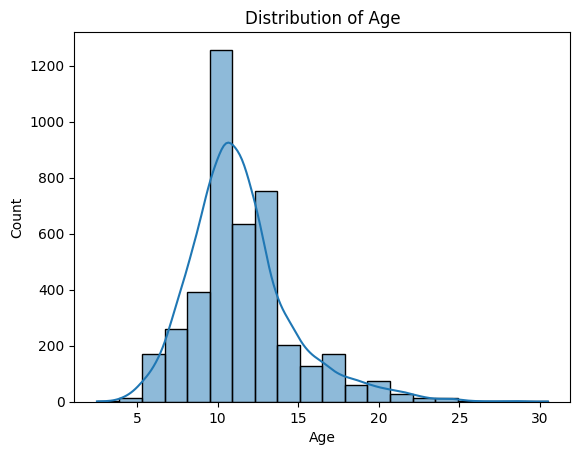

In [15]:
# Plot the distribution of the target variable 'Age'
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

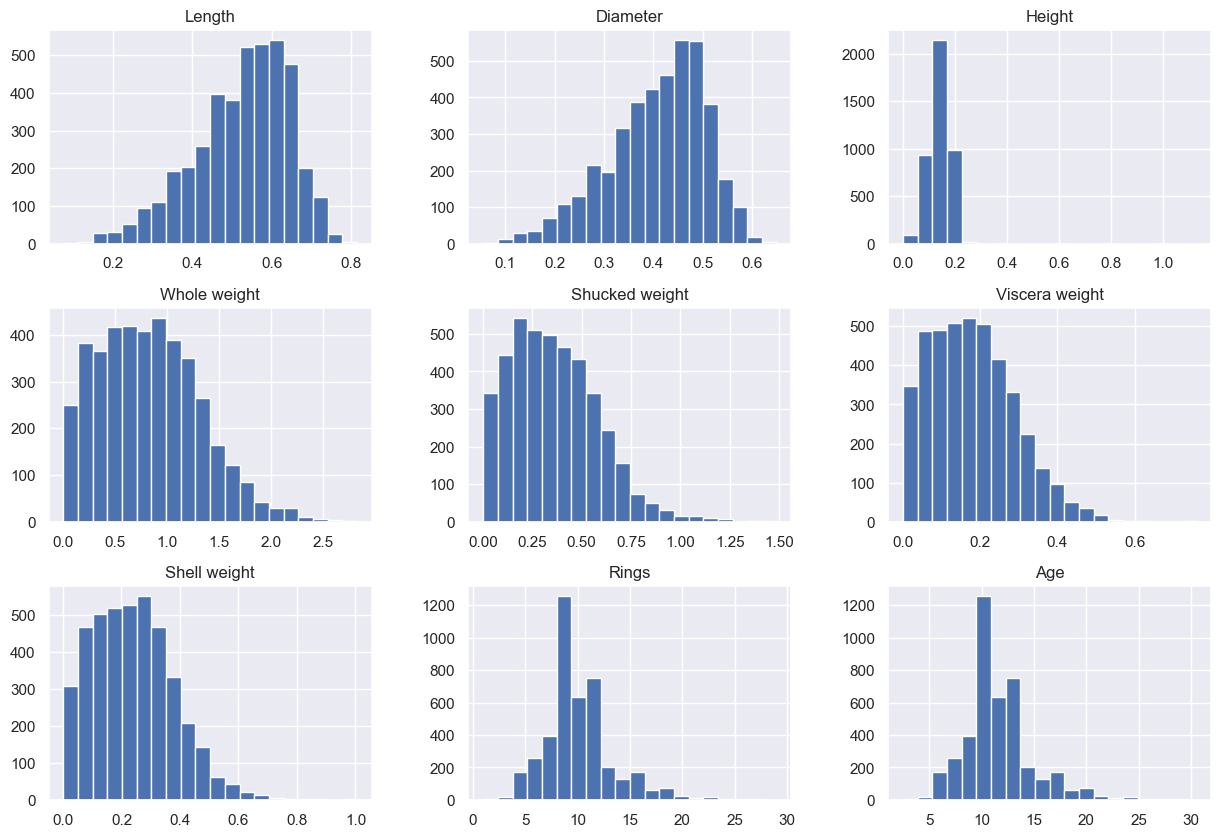

In [45]:
# Select only the numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms of all numerical variables
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.show()

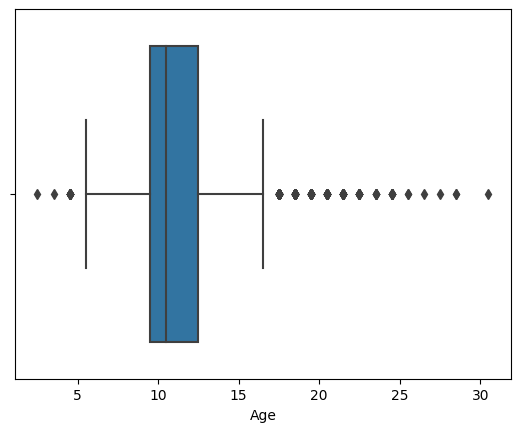

In [16]:
# Box plot of the target variable 'age'
sns.boxplot(data=df, x='Age')
plt.show()

/var/folders/qn/r0pmq06j7xd4s8l8qfb56dgh0000gn/T/ipykernel_22497/1591994281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


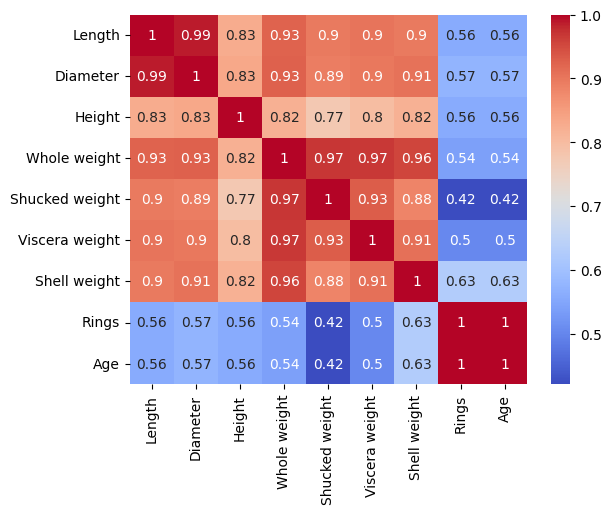

In [17]:
# Correlation matrix plot
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

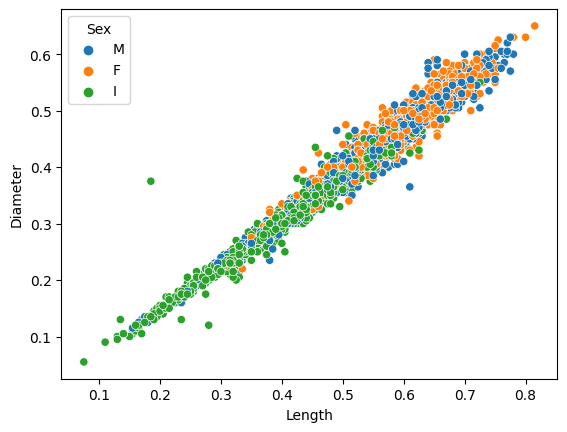

In [18]:
# Scatter plot of 'length' and 'diameter' with hue='Age'
sns.scatterplot(data=df, x='Length', y='Diameter', hue='Age')
plt.show()

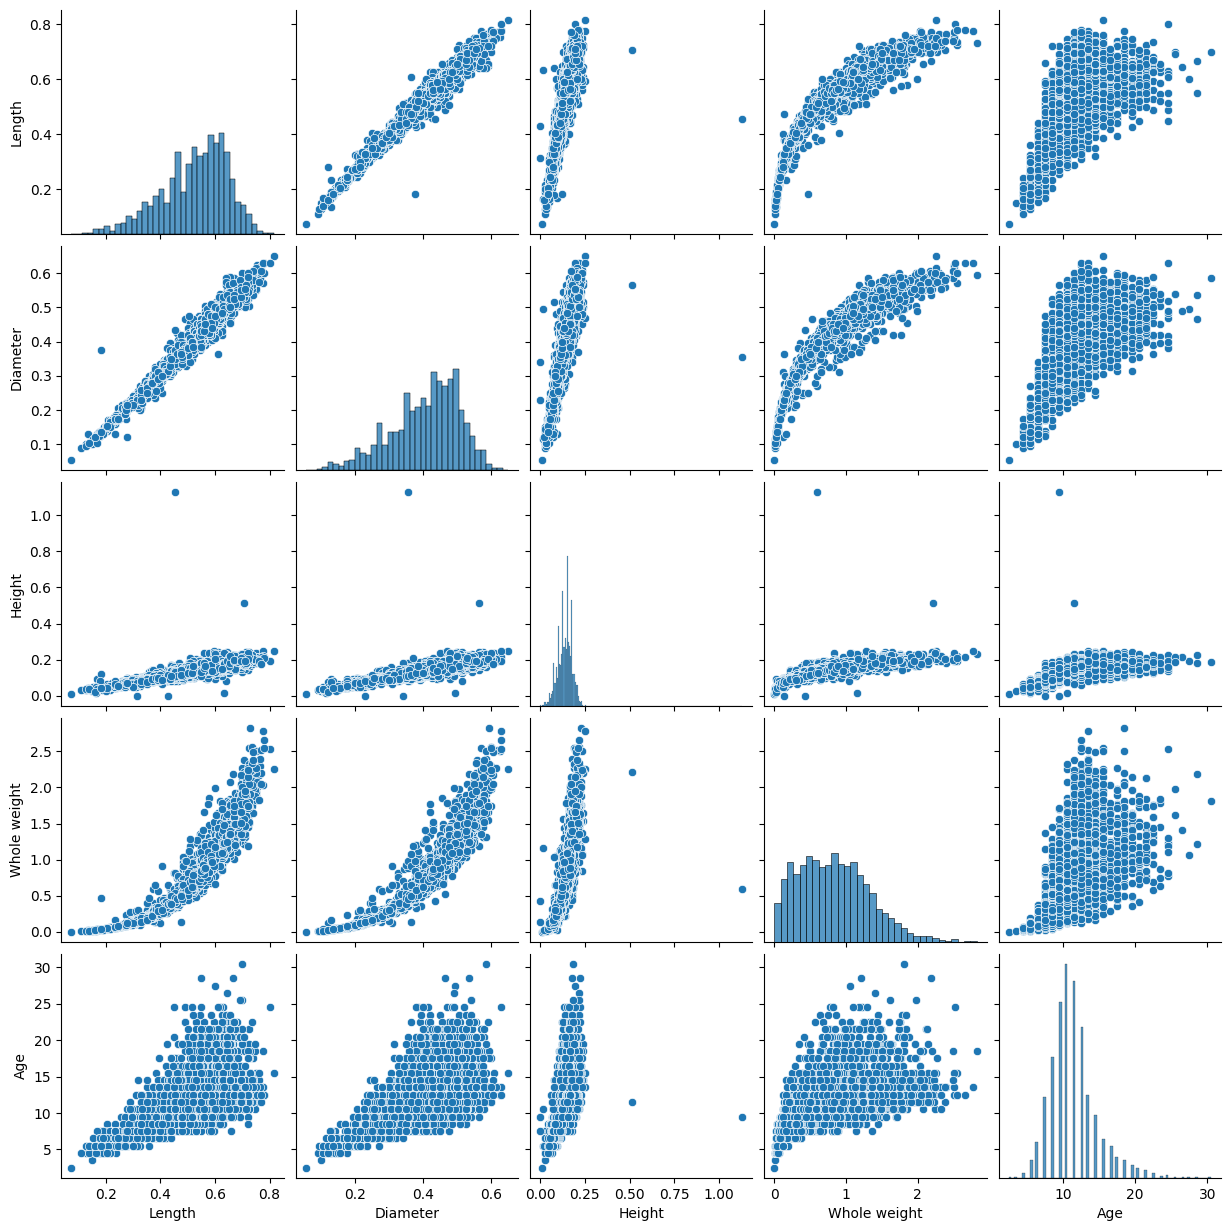

In [20]:
# Pair plot of selected numerical columns
sns.pairplot(data=df[['Length', 'Diameter', 'Height', 'Whole weight', 'Age']])
plt.show()

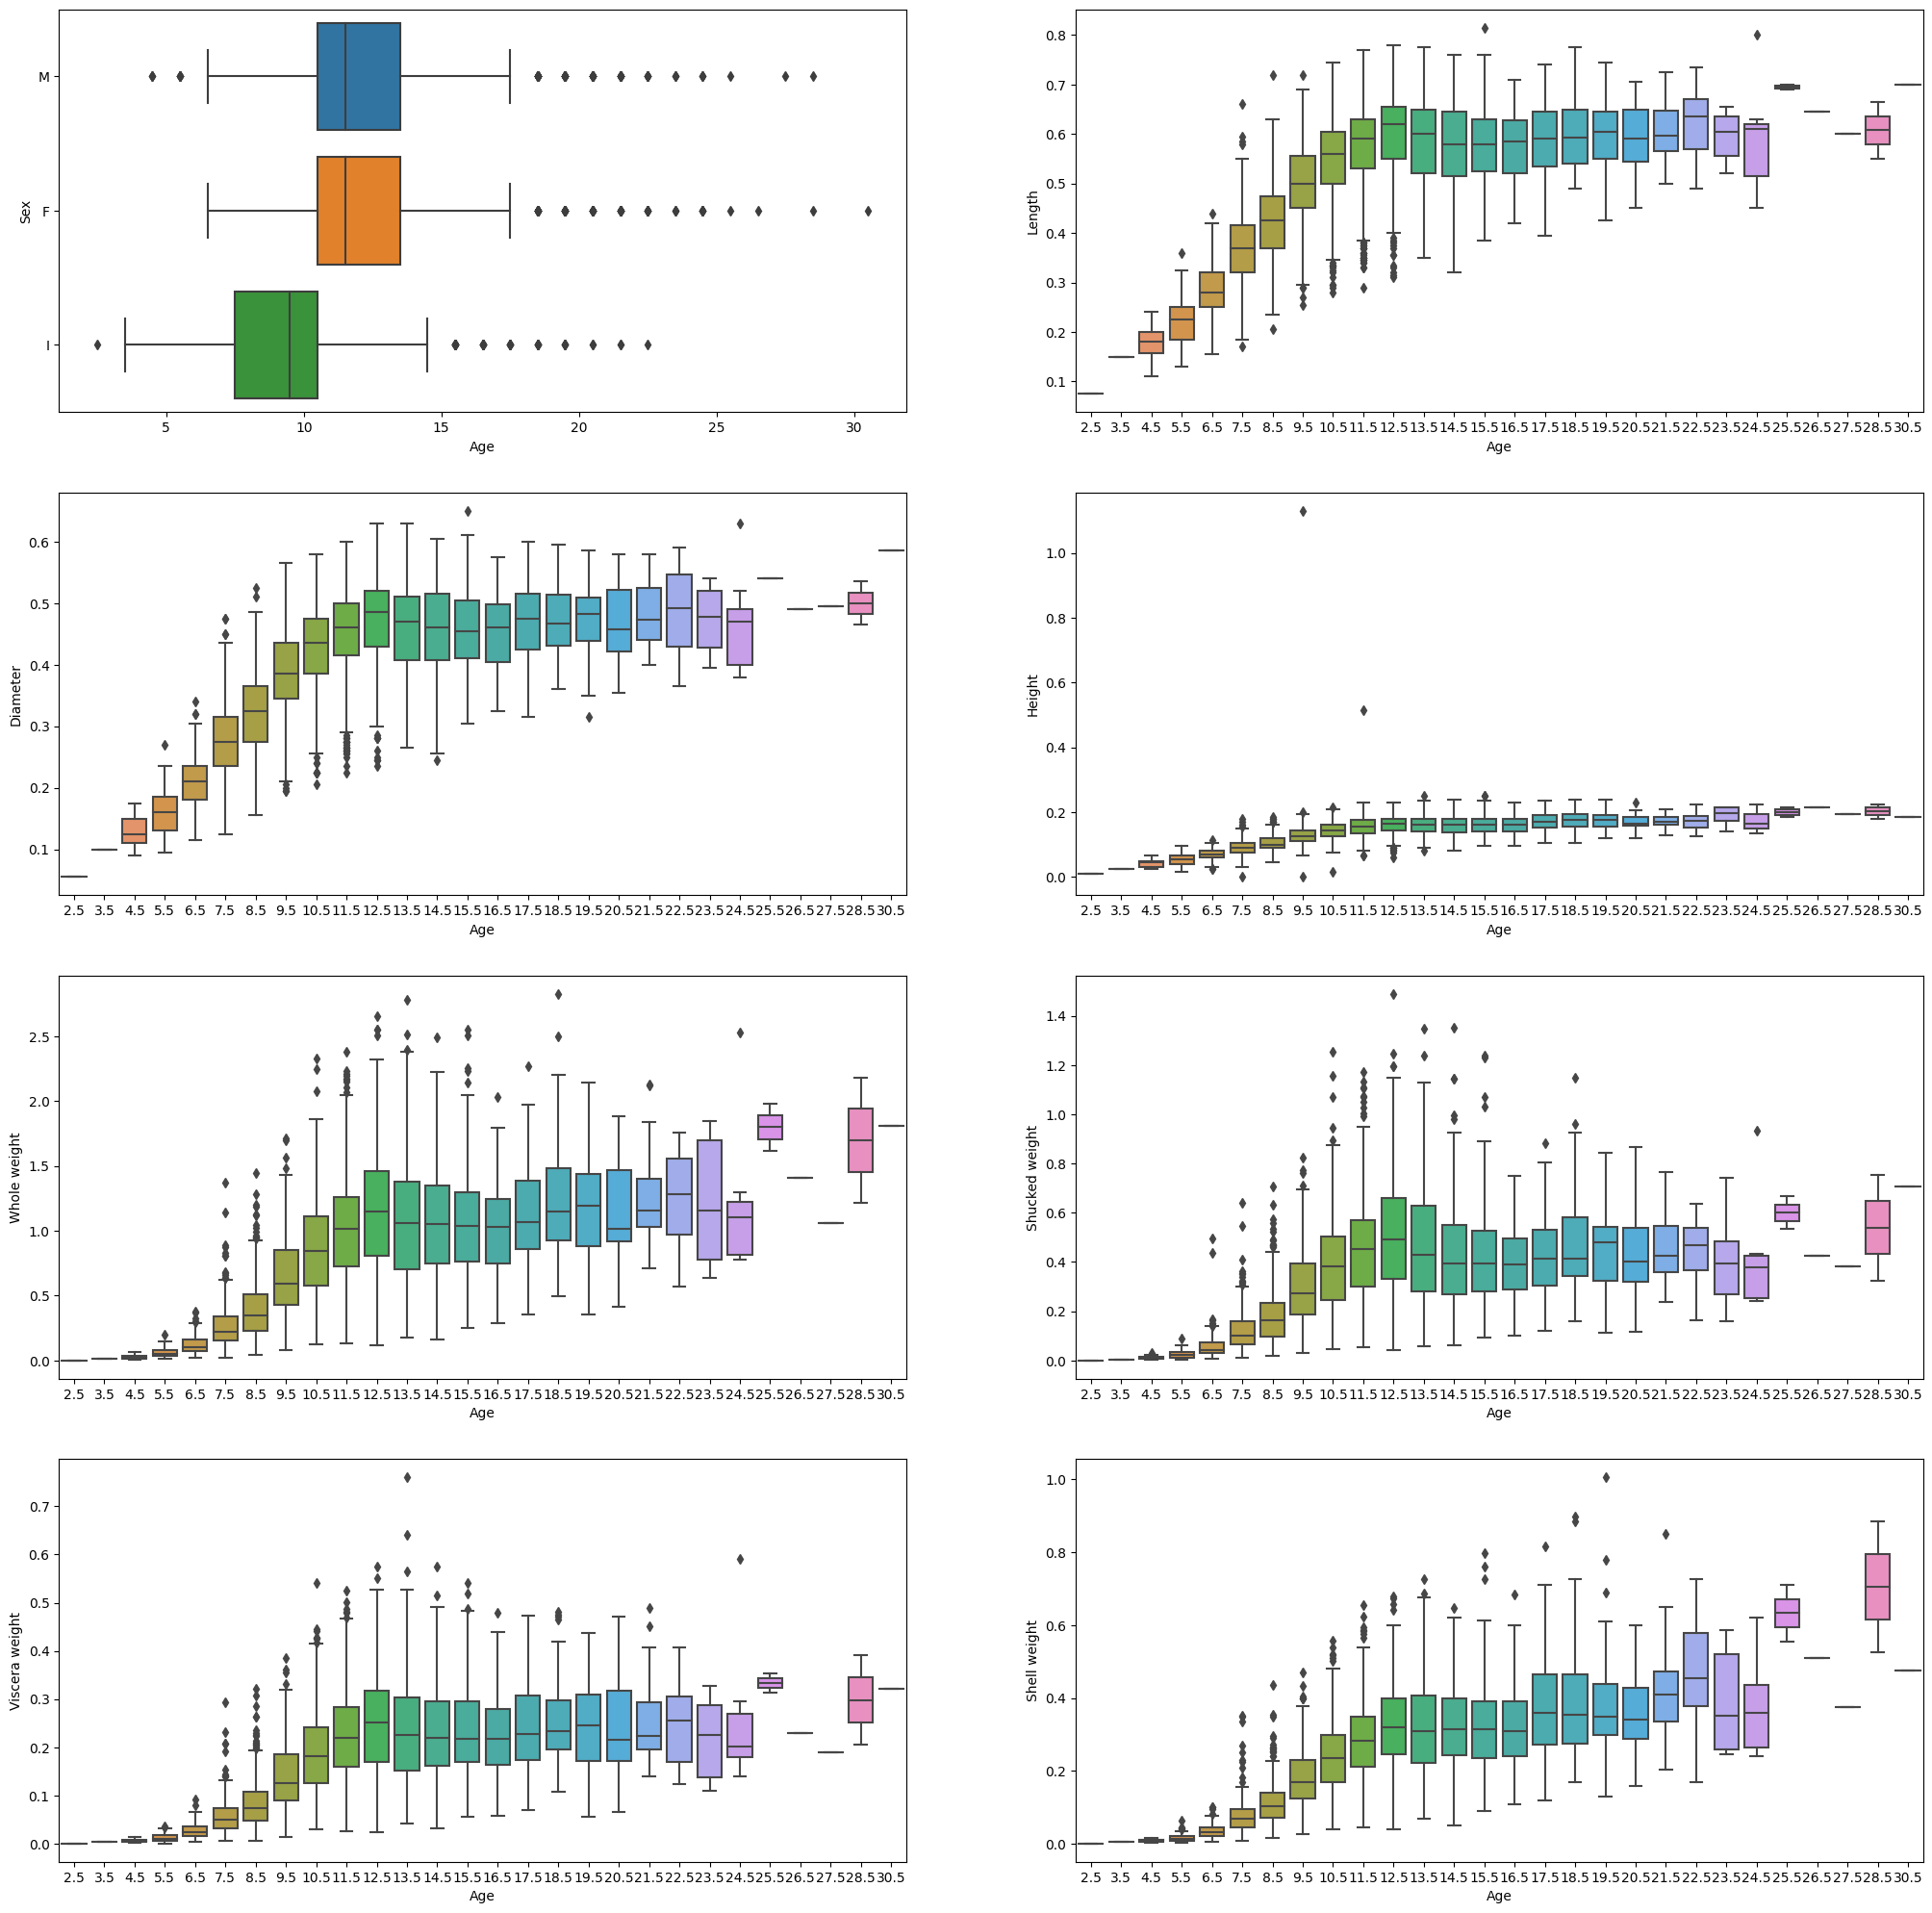

In [25]:
# Plot boxplots for each feature against the target variable age
fig, axes = plt.subplots(4, 2, figsize=(25,25))
sns.boxplot(ax=axes[0,0], x='Age', y='Age', data=df)
sns.boxplot(ax=axes[0,1], x='Age', y='Length', data=df)
sns.boxplot(ax=axes[1,0], x='Age', y='Diameter', data=df)
sns.boxplot(ax=axes[1,1], x='Age', y='Height', data=df)
sns.boxplot(ax=axes[2,0], x='Age', y='Whole weight', data=df)
sns.boxplot(ax=axes[2,1], x='Age', y='Shucked weight', data=df)
sns.boxplot(ax=axes[3,0], x='Age', y='Viscera weight', data=df)
sns.boxplot(ax=axes[3,1], x='Age', y='Shell weight', data=df)
plt.show()

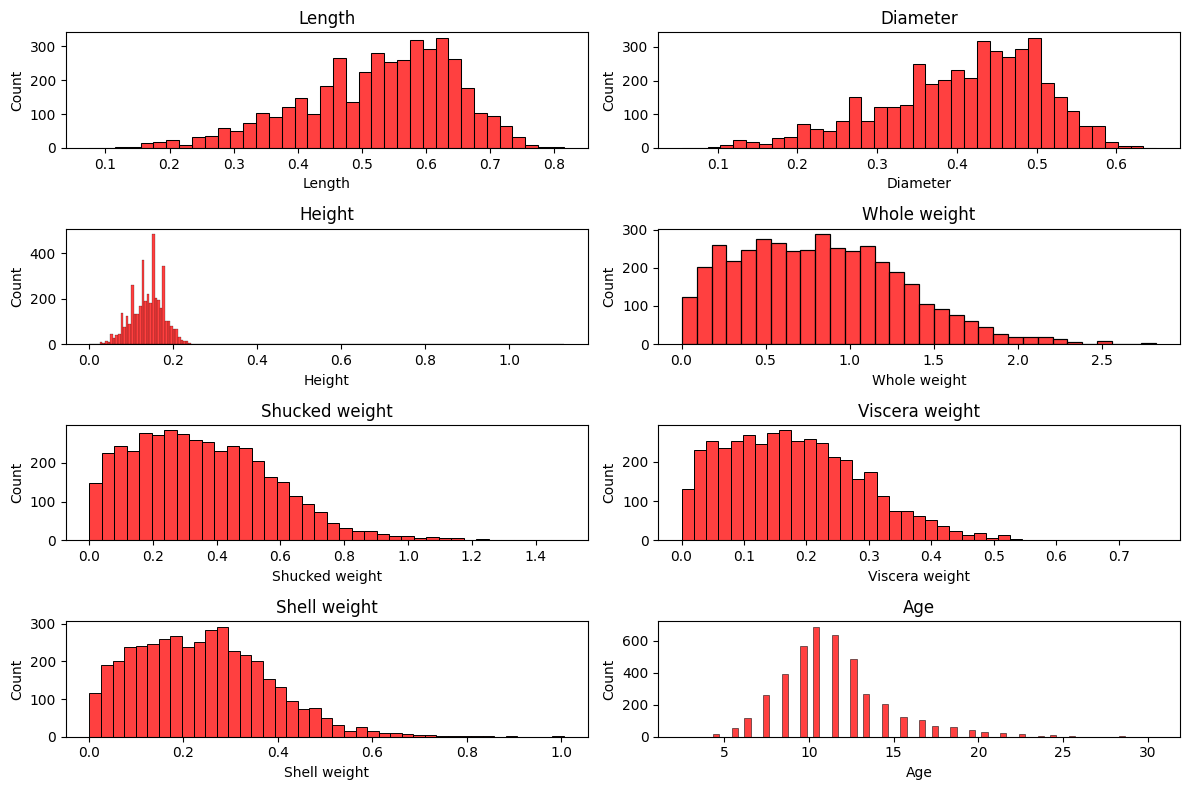

In [35]:
# Plot boxplots for each feature variable
num_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Age']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], kde=False, color='red')
    plt.title(col)
plt.tight_layout()
plt.show()

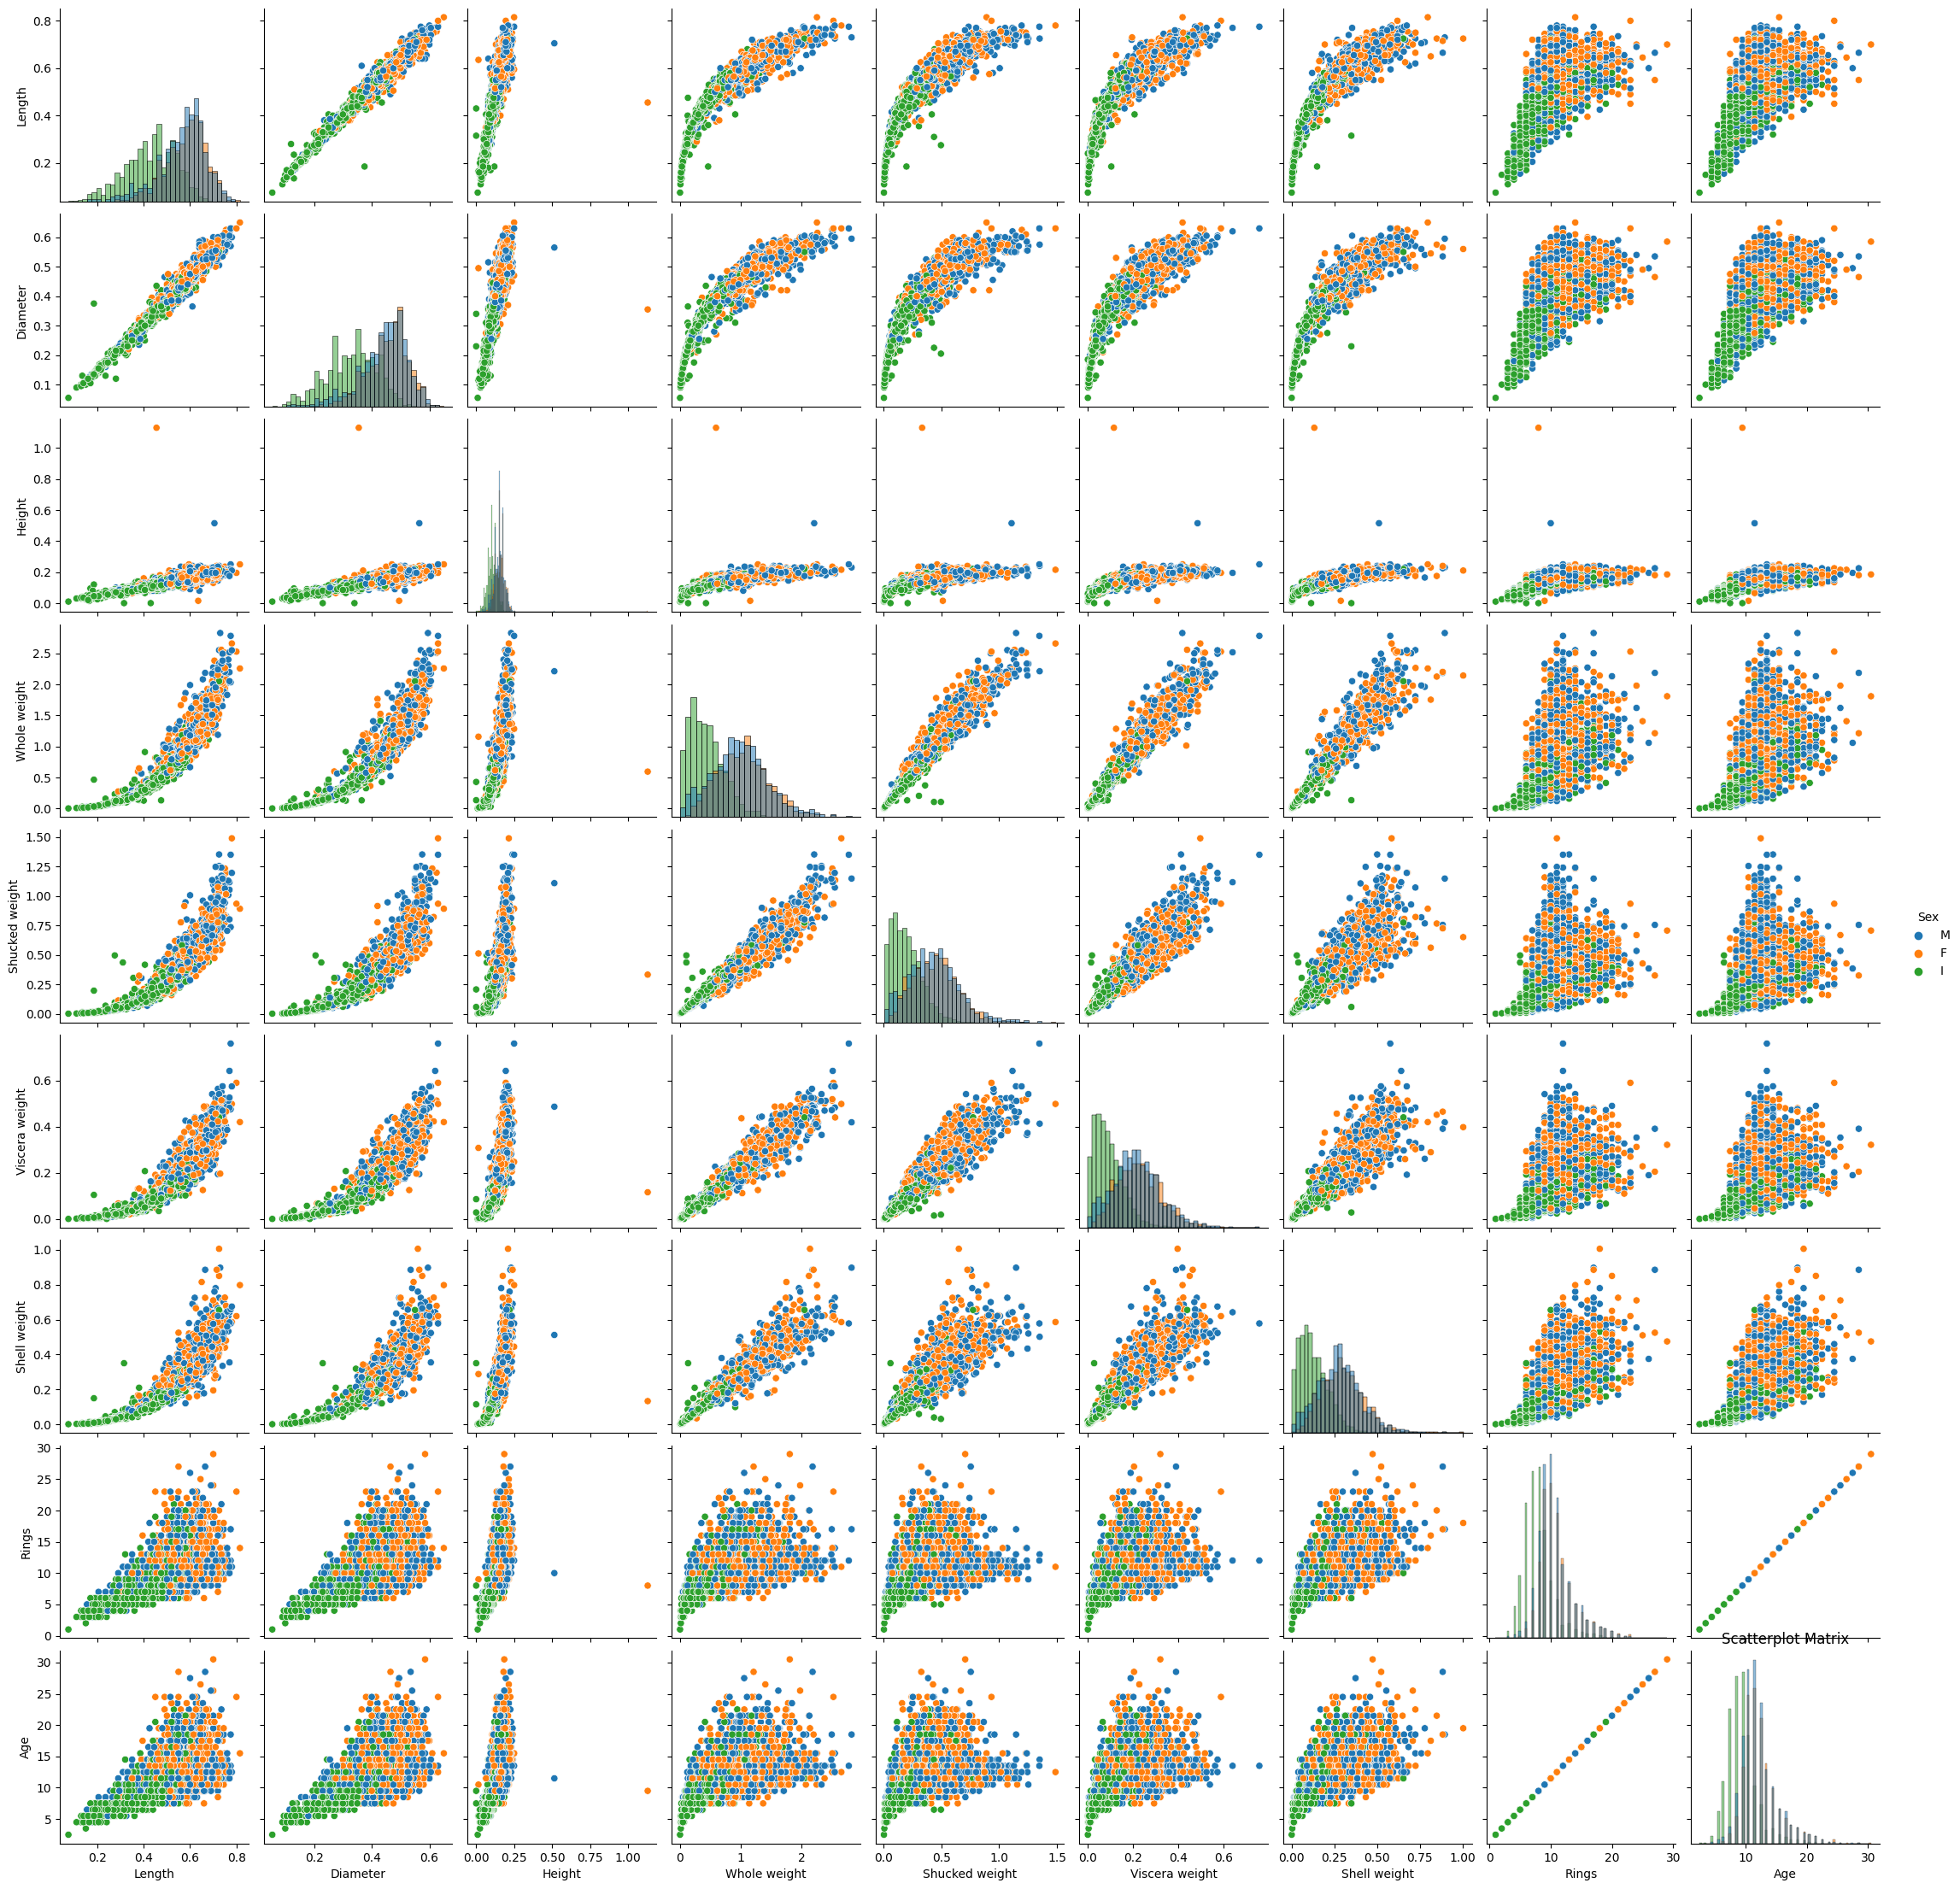

In [41]:
# Plot the scatterplot matrix
sns.pairplot(df, diag_kind='hist', hue='Sex')
plt.title("Scatterplot Matrix")
plt.show()

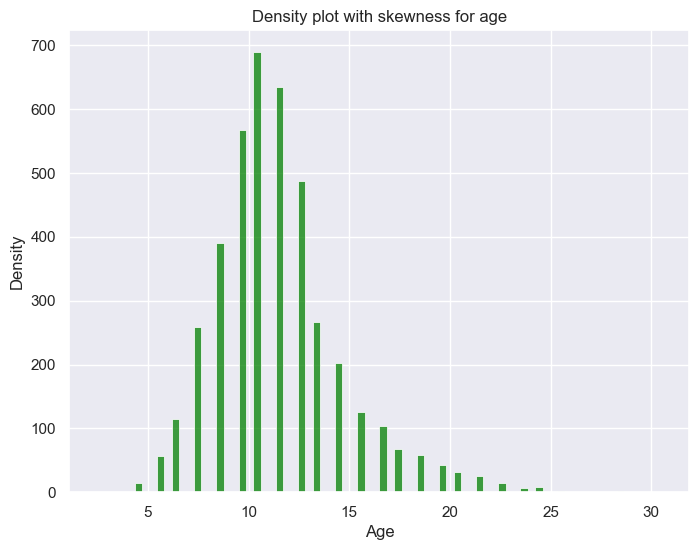

In [44]:
# Plot density plot with skewness
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df['Age'], ax=ax, color='green')
plt.title('Density plot with skewness for age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()